In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
density_idm_5500=np.load('Main5500_merge0average_density2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')

flow_idm_5500_9728=np.load('9728/Main5500_merge0average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')
flow_idm_5500_9575=np.load('9575/Main5500_merge0average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')
flow_idm_5500_9832=np.load('9832/Main5500_merge0average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')
flow_idm_5500_9813=np.load('9813/Main5500_merge0average_flow2730_1.2_idm_lcCoop0_lcStrategic1_freedepart.npy')



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_fundamental_diagram(*data_sets):
    plt.figure(figsize=(6, 4))
    
    for data, target_speed, label in data_sets:
        density_data, flow_data = zip(*data)
        
        def func(x, a, b, c, d):
            return a * x**3 + b * x**2 + c * x + d
        
        params, covariance = curve_fit(func, density_data, flow_data)
        a, b, c, d = params
        x_fit = np.linspace(min(density_data), max(density_data), 100)
        y_fit = func(x_fit, a, b, c, d)
        
        color = 'blue' if label == 'idm' else 'red'
        color= 'blue' if label=='cooperation=0' else 'red'
        color = 'blue' if label == 'stra=-1' else ('green' if label == 'stra=0.5' else 'red')

        
        plt.scatter(density_data, flow_data, label='Target Speed: {}m/s - {}'.format(target_speed, label), s=10, color=color)
    
    plt.xlabel('Density (veh/km)')
    plt.ylabel('Flow (veh/h)')
    plt.xlim(0, 180)
    plt.ylim(0, 12000)
    plt.title('Fundamental Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

data_l_30_idm=list(zip(1000*density_idm_5500,18*flow_idm_5500_9728))





In [15]:
density_idm_5500

array([0.03368363, 0.06298026, 0.05988741, 0.06305254, 0.06051988,
       0.06169447, 0.05982763, 0.06140117, 0.0609355 , 0.06087851,
       0.0612288 , 0.06163192, 0.0624298 , 0.06181262, 0.06131776,
       0.06179733, 0.06223381, 0.06109536, 0.06124548, 0.06018488,
       0.06118988, 0.06197943, 0.06278843, 0.06118154, 0.06164304,
       0.06164999, 0.06158743, 0.06253684, 0.06184876, 0.06239227,
       0.06061023, 0.06296775, 0.06191688, 0.06232555, 0.04831109,
       0.03008201, 0.02803725, 0.02525716, 0.02119405, 0.01775229,
       0.01472755, 0.01224493, 0.00759244, 0.00646928, 0.00222825,
       0.000335  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
18*flow_idm_5500_9728

array([1998, 5400, 5184, 5400, 5328, 5346, 5256, 5346, 5346, 5274, 5292,
       5328, 5364, 5346, 5418, 5328, 5274, 5346, 5292, 5292, 5328, 5328,
       5400, 5292, 5256, 5400, 5364, 5382, 5310, 5454, 5256, 5364, 5418,
       5328, 4986, 2952, 2898, 2556, 2160, 1854, 1512, 1386,  864,  612,
        342,   72,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

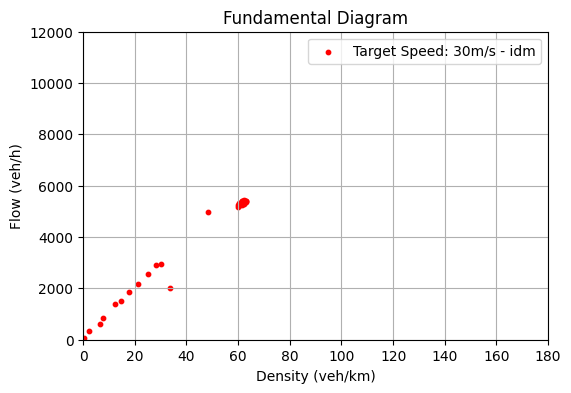

In [17]:
plot_fundamental_diagram((np.array(data_l_30_idm),30,'idm'))

Text(0, 0.5, 'Flow (veh/h)')

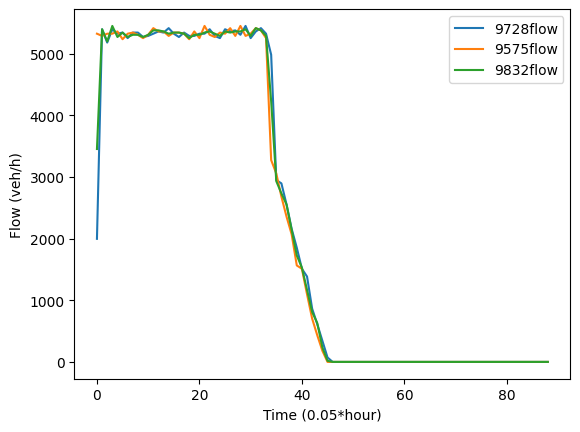

In [18]:
plt.plot(18*np.array(flow_idm_5500_9728),label='9728flow')
plt.plot(18*np.array(flow_idm_5500_9575),label='9575flow')
plt.plot(18*np.array(flow_idm_5500_9832),label='9832flow')

plt.xlabel('Time (0.05*hour)')
plt.legend()
plt.ylabel('Flow (veh/h)')